# DummyVariable and OneHotEncoding

In [33]:
import pickle
from sklearn.linear_model import LinearRegression

# Create a simple Linear Regression model
model = LinearRegression()

# Sample data for training
X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]

# Train the model
model.fit(X_train, y_train)

# Save the model to a file using pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)


In [34]:
##the above will create a model named "pickle "in your folder

In [35]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Ayush\OneDrive\Documents\townships.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# Now we would create DUMMY VARIABLES

In [36]:
dummies=pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


 since our category column is "town,now we will concatenate this data frame with original data frame

In [37]:
merged=pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


 Now we need to drop original township columns as now we have dummy variables in the name of townships and along with this we need to drop one township dummy variable also inorder to prevent "dummy variable trap".Lets drop west windsor column.

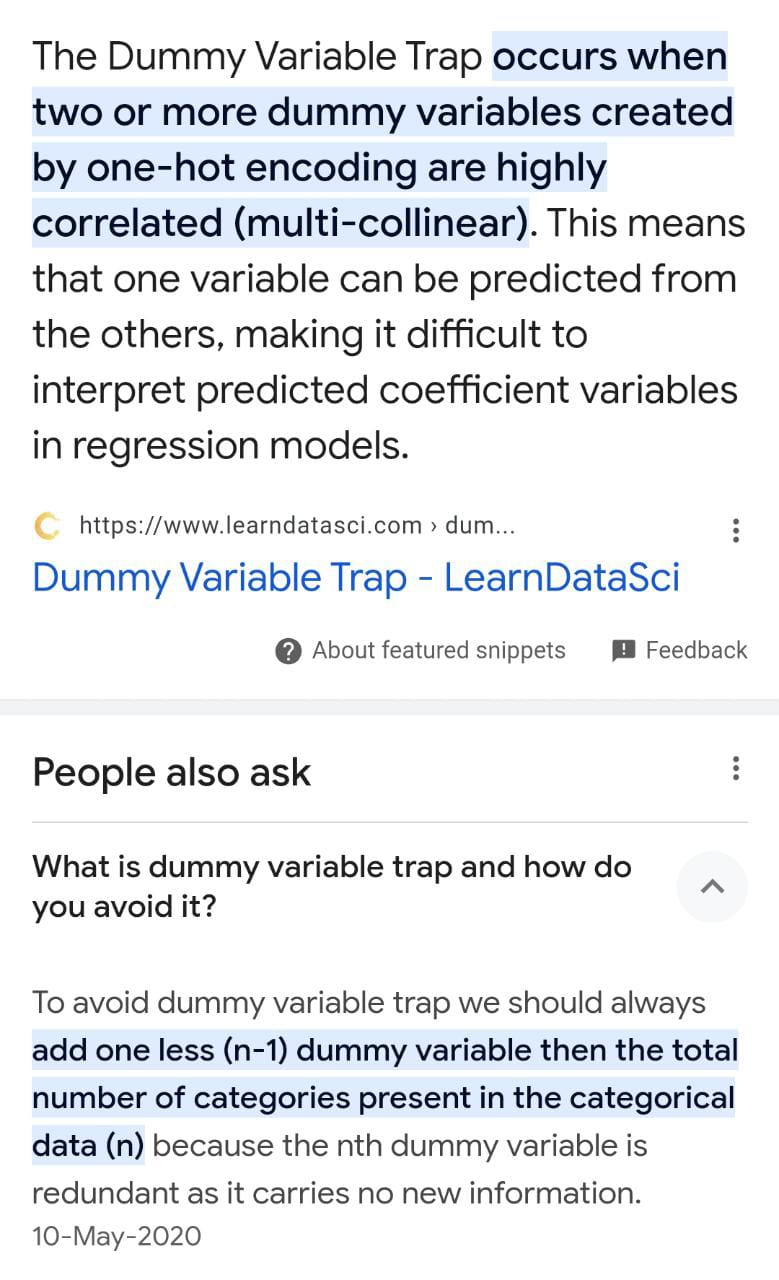

In [38]:
final=merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


when we are using SKLEARN linear regression then our dummy variable(any one)would we dropped automatically as it is aware of dummy variable trap buts its always a good practice to drop it by your own. Now we will create linear regression model object ,

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [40]:
x=final.drop(['price'],axis='columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [41]:
y=final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [42]:
model.fit(x,y)

LinearRegression()

In [43]:
model.predict([[2800,0,1]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [44]:
model.predict([[3400,0,0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [45]:
model.score(x,y)

0.9573929037221873

This tells us that our model is 95.73% accurate

In [46]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In order to use ONE HOT ENCODER,first we need to do label encoding on the TOWN column

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
dfle=df
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [51]:
x=df[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [52]:
y=dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [62]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'categorical_features'

In [61]:
ohe.fit_transform(x).toarray()

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample data with categorical and numerical features
data = x

# Specify which columns need to be one-hot encoded (in this example, column 0)
categorical_features = [0]

# Create a ColumnTransformer to apply the OneHotEncoder to the specified columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Fit and transform the data using the ColumnTransformer
transformed_data = preprocessor.fit_transform(data)

print(transformed_data)


[[1.0e+00 0.0e+00 0.0e+00 2.6e+03]
 [1.0e+00 0.0e+00 0.0e+00 3.0e+03]
 [1.0e+00 0.0e+00 0.0e+00 3.2e+03]
 [1.0e+00 0.0e+00 0.0e+00 3.6e+03]
 [1.0e+00 0.0e+00 0.0e+00 4.0e+03]
 [0.0e+00 0.0e+00 1.0e+00 2.6e+03]
 [0.0e+00 0.0e+00 1.0e+00 2.8e+03]
 [0.0e+00 0.0e+00 1.0e+00 3.3e+03]
 [0.0e+00 0.0e+00 1.0e+00 3.6e+03]
 [0.0e+00 1.0e+00 0.0e+00 2.6e+03]
 [0.0e+00 1.0e+00 0.0e+00 2.9e+03]
 [0.0e+00 1.0e+00 0.0e+00 3.1e+03]
 [0.0e+00 1.0e+00 0.0e+00 3.6e+03]]


In [79]:
x=transformed_data


in order to avoid dummy variable trap ,drop one dummy variable .The next step eould drop zeroth column and take all rows

In [80]:
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [81]:

x = x[:, 1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [82]:
model.fit(x,y)

LinearRegression()

In [83]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [84]:
model.predict([[ 0,1,3400]])

array([681241.6684584])

In [85]:
model.score(x,y)

0.9573929037221873

So,it is giving same output as earlier

 Now we have to predict price of Mercedes benz that is 4 yrs old with run of 45000,bmw x5 that is 7 yr old with run of 86000

In [91]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Ayush\OneDrive\Documents\cars.csv")
df

,carmodel,mileage,sellprice,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,AUDI A5,59000,29400,5
6,AUDI A5,52000,32000,5
7,AUDI A5,72000,19300,6
8,AUDI A5,91000,12000,8
9,mercedez,67000,22000,6


In [92]:
dummies=pd.get_dummies(df.carmodel)
dummies

,AUDI A5,BMW X5,mercedez
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [95]:
merged=pd.concat([df,dummies],axis='columns')
merged

,carmodel,mileage,sellprice,age,AUDI A5,BMW X5,mercedez
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,AUDI A5,59000,29400,5,1,0,0
6,AUDI A5,52000,32000,5,1,0,0
7,AUDI A5,72000,19300,6,1,0,0
8,AUDI A5,91000,12000,8,1,0,0
9,mercedez,67000,22000,6,0,0,1


In [100]:
final=merged.drop(['carmodel','AUDI A5','sellprice'],axis='columns')
final

,mileage,age,BMW X5,mercedez
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [98]:
y=df.sellprice
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: sellprice, dtype: int64

In [99]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [101]:
model.fit(final,y)

LinearRegression()

In [102]:
model.predict([[45000,4,0,1]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [103]:
model.predict([[86000,7,1,0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [104]:
model.score(final,y)

0.9417050937281083